<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/SRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('dataset1.csv',)

In [ ]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
scaled_data = data[['UNIXTime','Radiation']].iloc[:31000,:]
scaled_data.set_index('UNIXTime',drop=True,inplace=True)
scaled_data.tail()

,Radiation
UNIXTime,
1481318139,120.52
1481317850,107.32
1481317540,144.85
1481317251,179.73
1481316953,193.00


In [ ]:
MMS = MinMaxScaler()
scaled_data[scaled_data.columns] = MMS.fit_transform(scaled_data)
scaled_data.head()

,Radiation
UNIXTime,
1475229326,0.000062
1475229023,0.000062
1475228726,0.000075
1475228421,0.000062
1475228124,0.000037


In [ ]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(monitor='loss',patience=5)

In [83]:
model=Sequential([Conv1D(100,kernel_size=3,input_shape=(30,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2),
                 Flatten(),
                  RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')),
                 Dense(128,activation='relu'),
                 Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [86]:
new_df1=pd.DataFrame(list(data['Radiation']), index=data['UNIXTime'], columns=['Rad'])

In [ ]:
new_df1

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(-1,1))

In [92]:
scaled_data=scaler.fit_transform(new_df1)
scaled_data[:5]

array([[-0.99987501],
       [-0.99987501],
       [-0.99985001],
       [-0.99987501],
       [-0.99992501]])

In [93]:
steps=30
inp1=[]
out1=[]

for i in range(len(scaled_data)-steps):
    inp1.append(scaled_data[i:i+steps])
    out1.append(scaled_data[i+steps])

In [94]:
inp1=np.asanyarray(inp1)
out1=np.asanyarray(out1)
x_train1=inp1[:500,:,:]
x_test1=inp1[500:,:,:]
y_train1=out1[:500]
y_test1=out1[500:]

In [95]:
model.fit(x_train1,y_train1,epochs=20)

Epoch 1/20
16/16 [==============================] - 14s 316ms/step - loss: 0.1337 - accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 5s 287ms/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 5s 282ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 5s 288ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 5s 279ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 5s 299ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 5s 303ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 8/20
16/16 [==============================] - 6s 369ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 9/20
16/16 [==============================] - 5s 283ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 10/20
16/16 [==============================] - 5s 301ms/s

In [96]:
predicted=model.predict(x_test1)

In [97]:
predicted1=scaler.inverse_transform(predicted)

In [100]:
y_test2=scaler.inverse_transform(y_test1)

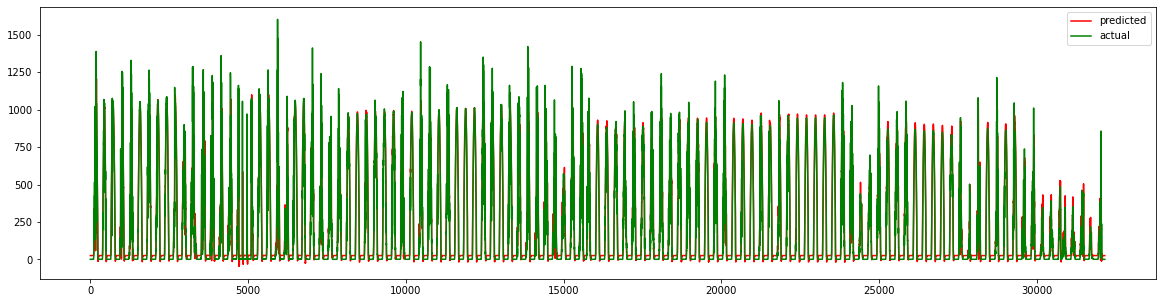

In [101]:
plt.figure(figsize=(20,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_test2,'g',label='actual')
plt.legend()
plt.show()

In [ ]:
training_size = round(len(scaled_data) * 0.80)
train_data = scaled_data[:training_size]
test_data  = scaled_data[training_size:]

In [ ]:
x_train1, y_train1 = create_sequence(train_data,30)
x_test1, y_test1 = create_sequence(test_data,30)

print(x_train1.shape, x_test1.shape)

In [ ]:
history = model.fit(x_train1, y_train1, epochs =10, validation_data = (x_test1, y_test1), verbose = 1)